## LDA INDIA POSITIVE WORDS_ALL

In [52]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from collections import Counter

import ast
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
from nltk.corpus import stopwords
import re

In [11]:
df = pd.read_csv("../pos_neg_india.csv")
df

,Unnamed: 0,index,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
0,0,0,soniya mummy hoti toh covid me magic stick ghu...,soniya mummy hoti toh covid me magic stick ghu...,Unknown,soniya mummy hoti toh covid me magic stick ghu...,Unknown,"[('soniya', 'JJ'), ('mummy', 'NN'), ('hot', 'J...","['soniya', 'mummy', 'hot', 'toh', 'couid', 'ma...",['death'],['death'],subjective,0
1,12,12,is covid ki waja se buht saray logon ne apne p...,is covid ki waja se buht saray logon ne apne p...,Unknown,is covid ki waja se buht saray logon ne apne p...,Unknown,"[('is', 'VBZ'), ('couid', 'JJ'), ('ki', 'NN'),...","['couid', 'ki', 'raja', 'se', 'spray', 'logon'...","['hair', 'ply', 'vaccination']","['hair', 'ply', 'vaccination']",subjective,2
2,18,18,deaths due covid what is vaccination rate what...,deaths due covid what is vaccination rate what...,"ENGLISH, Unknown",deaths due covid what is vaccination rate what...,"ENGLISH, Unknown","[('deaths', 'NNS'), ('due', 'JJ'), ('couid', '...","['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'couid', 'vaccination', 'rate', 'har...",subjective,2
3,28,28,vaccination against covid- 19 is necessity tod...,vaccination against covid- 19 is necessity tod...,ENGLISH,vaccination against covid- 19 is necessity tod...,ENGLISH,"[('vaccination', 'NN'), ('against', 'IN'), ('c...","['vaccination', 'couid', 'nineteen', 'necessit...","['necessity', 'today', 'scenario', 'hope', 'pr...","['necessity', 'today', 'scenario', 'problem']",subjective,2
4,33,33,very surprising that unvaccinated population &...,very surprising that unvaccinated population &...,ENGLISH,very surprising that unvaccinated population &...,ENGLISH,"[('very', 'RB'), ('surprising', 'JJ'), ('that'...","['surprising', 'vaccinated', 'population', 'yr...","['surprising', 'vaccinated', 'population', 'yr...","['population', 'yrs', 'offline', 'class', 'amp...",subjective,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37618,95179,95179,nature seems have already started working savi...,nature seems have already started working savi...,ENGLISH,nature seems have already started working savi...,ENGLISH,"[('nature', 'NN'), ('seems', 'VBZ'), ('have', ...","['nature', 'seem', 'already', 'start', 'work',...","['nature', 'seem', 'already', 'start', 'work',...","['nature', 'generation', 'vaccinesaveslive', '...",subjective,2
37619,95180,95180,"dear , we #india 🇮🇳has helped this #world incl...","dear , we #india Indiahas helped this #world i...",ENGLISH,"dear , we #india Indiahas helped this #world i...",ENGLISH,"[('dear', 'IN'), ('we', 'PRP'), ('india', 'VBP...","['dear', 'india', 'indians', 'help', 'world', ...","['dear', 'help', 'world', 'include', 'kindness...","['world', 'kindnessmatter', 'vaccinesaveslive']",subjective,2
37620,95184,95184,our sincere request state central govt 🙏🙏. ple...,our sincere request state central govt folded_...,ENGLISH,our sincere request state central govt folded_...,ENGLISH,"[('our', 'PRP$'), ('sincere', 'JJ'), ('request...","['sincere', 'request', 'state', 'central', 'go...","['sincere', 'request', 'state', 'central', 'go...","['request', 'state', 'govt', 'share', 'vaccine...",subjective,2
37621,95185,95185,thanks your appreciation valuable feedback abo...,thanks your appreciation valuable feedback abo...,ENGLISH,thanks your appreciation valuable feedback abo...,ENGLISH,"[('thanks', 'NNS'), ('your', 'PRP$'), ('apprec...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'feedback', 'vaccine...",subjective,2


In [12]:
df.drop(columns = ['Unnamed: 0', 'Text', 'index', 'new_text', 'languages', 'new_languages', 'pos_tagged_words'], inplace = True)
df.head()

,translated,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
0,soniya mummy hoti toh covid me magic stick ghu...,"['soniya', 'mummy', 'hot', 'toh', 'couid', 'ma...",['death'],['death'],subjective,0
1,is covid ki waja se buht saray logon ne apne p...,"['couid', 'ki', 'raja', 'se', 'spray', 'logon'...","['hair', 'ply', 'vaccination']","['hair', 'ply', 'vaccination']",subjective,2
2,deaths due covid what is vaccination rate what...,"['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'couid', 'vaccination', 'rate', 'har...",subjective,2
3,vaccination against covid- 19 is necessity tod...,"['vaccination', 'couid', 'nineteen', 'necessit...","['necessity', 'today', 'scenario', 'hope', 'pr...","['necessity', 'today', 'scenario', 'problem']",subjective,2
4,very surprising that unvaccinated population &...,"['surprising', 'vaccinated', 'population', 'yr...","['surprising', 'vaccinated', 'population', 'yr...","['population', 'yrs', 'offline', 'class', 'amp...",subjective,0


In [13]:
df.info() # no empty rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37623 entries, 0 to 37622
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   translated                         37623 non-null  object
 1   words_processed_all                37623 non-null  object
 2   words_processed_noun_adj_verb_adv  37623 non-null  object
 3   words_processed_noun               37623 non-null  object
 4   text_type                          37623 non-null  object
 5   sentiment                          37623 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.7+ MB


In [14]:
df['sentiment'].value_counts()

0    20029
2    17594
Name: sentiment, dtype: int64

In [15]:
positive_df = df[df['sentiment'] == 2]
positive_df.head()

,translated,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
1,is covid ki waja se buht saray logon ne apne p...,"['couid', 'ki', 'raja', 'se', 'spray', 'logon'...","['hair', 'ply', 'vaccination']","['hair', 'ply', 'vaccination']",subjective,2
2,deaths due covid what is vaccination rate what...,"['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'due', 'couid', 'vaccination', 'rate...","['death', 'couid', 'vaccination', 'rate', 'har...",subjective,2
3,vaccination against covid- 19 is necessity tod...,"['vaccination', 'couid', 'nineteen', 'necessit...","['necessity', 'today', 'scenario', 'hope', 'pr...","['necessity', 'today', 'scenario', 'problem']",subjective,2
5,dr. deserved #1 minister's award his exception...,"['deserved', 'one', 'minister', 'award', 'exce...","['deserved', 'way', 'manage', 'thing', 'millen...","['way', 'thing', 'millennium', 'peril', 'couid...",subjective,2
6,"yeah i still do not get why, symptoms are much...","['yeah', 'still', 'not', 'get', 'symptom', 'mu...","['still', 'symptom', 'much', 'less', 'severe',...","['symptom', 'vaccination', 'example', 'country...",subjective,2


In [17]:
len(positive_df['words_processed_all'])

17594

In [65]:
# load all functions

from itertools import combinations

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [77]:
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

stop_list = stopwords.words('english')
stop_list.remove("not")
stop_list.remove("do")
stop_list.remove("we")
# stop_list

In [78]:
#list of tokenized documents
words_processed_list = []
for each in positive_df['words_processed_all']:
    # convert from str list to list
    new_row = each.strip("[]").replace("'", "").replace(",","")
    words_processed_list.append(new_row)
# words_processed_list

In [79]:
len(words_processed_list)

17594

In [80]:
docgen = TokenGenerator(words_processed_list, stop_list )
w2v_model = gensim.models.Word2Vec(docgen, min_count = 1, sg = 1)
print("Model has %d terms" % len(w2v_model.wv.key_to_index))
# print(w2v_model.wv.key_to_index)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Model has 19970 terms


In [81]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
tweet_vecs = vectorizer.fit_transform(words_processed_list)
# print(reviews_vecs)
tweet_vecs.shape

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()
# print(feature_names)

In [63]:
kmin, kmax = 4, 15
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying LDA for k=%d ..." % k )
    # run LDA
    model = LatentDirichletAllocation(n_components=k,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)        
    W = model.fit_transform( tweet_vecs )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )


In [82]:
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( feature_names, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=04: Coherence=0.6026
K=05: Coherence=0.6372
K=06: Coherence=0.6289
K=07: Coherence=0.6701
K=08: Coherence=0.6678
K=09: Coherence=0.6714
K=10: Coherence=0.6901
K=11: Coherence=0.6970
K=12: Coherence=0.6903
K=13: Coherence=0.6854
K=14: Coherence=0.7184
K=15: Coherence=0.7114


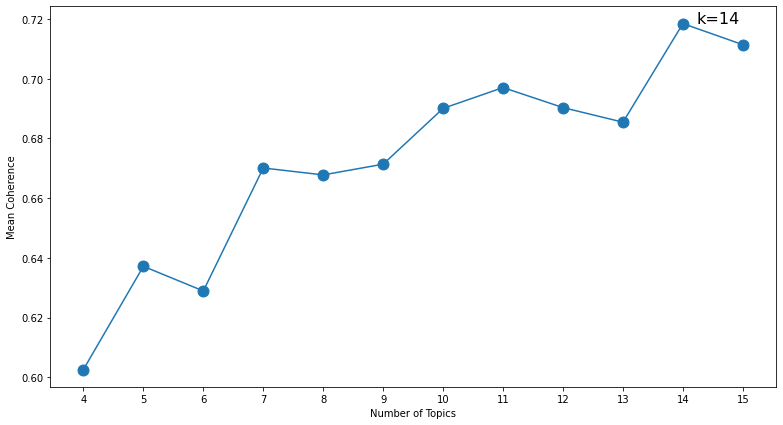

In [83]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [84]:
final_n = k_values[coherences.index(max(coherences))]
    
print("Best num_topics =", final_n)

# Define Search Param
search_params = {'n_components': [final_n], 'learning_decay': [.5, .6, .7, .8, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tweet_vecs)

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Params= ", model.best_params_)

Best num_topics = 14
Best Params=  {'learning_decay': 0.6, 'n_components': 14}


In [85]:
tweet_lda = LatentDirichletAllocation(n_components = final_n,               # Number of topics
                                  learning_method='online',   
                                  n_jobs = -1,
                                   learning_decay = model.best_params_['learning_decay'])              # use all available CPU
lda_output = tweet_lda.fit_transform(tweet_vecs)

# Log Likelyhood: Higher the better
print("\nLog Likelihood: ", tweet_lda.score(tweet_vecs))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", tweet_lda.perplexity(tweet_vecs))

# See model parameters
pprint(tweet_lda.get_params())


Log Likelihood:  -2267682.304316497
Perplexity:  2936.80639847456
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.6,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 14,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


Topic 0:
covidvaccine hai vaccine ki ke hour hi ka problem nazi couid se consider employee send
Topic 1:
vaccinate get request yet vaccinated put ask getvaccinate today soon_possible covishieldvaccine tweet nurse society around
Topic 2:
get vaccinated dose vaccine safe fully thank covishield take everyone today please couid vaccination family
Topic 3:
jab available parent ur anyone dubai crowd necessary appeal proper science local la tu conduct
Topic 4:
come keep follow couid good early even symptom wave morning government vaccination amp something around
Topic 5:
india sure must country population indians one happen responsible vaccinationdrive every million usa thing want
Topic 6:
indian india proud share modi always crore cost love coronavaccine record free amp watch fail
Topic 7:
vaccinated get not vaccine couid go amp people vaccination stay corona nineteen mask protect virus
Topic 8:
syringe fully four indiafightscorona shot process ensure pfizer turn booster covidvaccination fiv

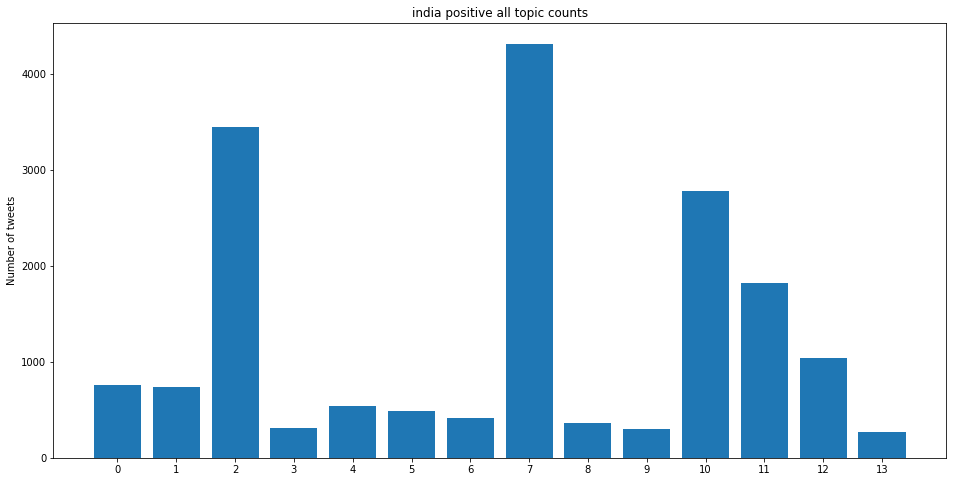

In [86]:
# Write a function to display the topics and for each topic we choose the top most frequent words. 

no_top_words = 15
display_topics(tweet_lda, feature_names, no_top_words)

lda_keys = get_keys(lda_output)
lda_categories, lda_counts = keys_to_counts(lda_keys)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_ylabel('Number of tweets');
ax.set_title("india positive all" + ' topic counts');
plt.show()

In [89]:
# Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Generate the visuals
visual = pyLDAvis.sklearn.prepare(tweet_lda, tweet_vecs, vectorizer, mds='tsne')

# Save the output|to the html file
pyLDAvis.save_html(visual, "india_positive_all.html")

/Users/harpreet/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/harpreet/Library/Python/3.